In [26]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import tensorflow as tf
from collections import Counter

#https://www.youtube.com/redirect?event=video_description&redir_token=QUFFLUhqbWlOcGUxTk9aZk02VGpuZjdPQVhOTmcwb0lZZ3xBQ3Jtc0tuZDRYRzN1S21iRVdPX3hOSkJtZmxXZm1vSTNvSXZtdDlDaEZSc0s2MHgyU2tGWlRYRkpRbzg1eHlLbmlMenFPb1g1ZHc4dFk1dUZmMTRmTTh2TjNzbUpCUHpYZkxRb01PU2hZUERkVUpaYkY3SkF0dw&q=https%3A%2F%2Fwww.kaggle.com%2Fsaadbinmanjuradit%2Fecommerce-reviews-for-women-clothings

In [4]:
data = pd.read_csv('../input/ecommerce-reviews-for-women-clothings/Womens-Clothing-E-Commerce-Reviews.csv')

In [5]:
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [8]:
data.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [9]:
data["Class Name"].value_counts()

Dresses           6321
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: Class Name, dtype: int64

## To predict whether it is a 5 star

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23488 entries, 0 to 23487
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23488 non-null  int64 
 1   Clothing ID              23488 non-null  int64 
 2   Age                      23488 non-null  int64 
 3   Title                    19678 non-null  object
 4   Review Text              22643 non-null  object
 5   Rating                   23488 non-null  int64 
 6   Recommended IND          23488 non-null  int64 
 7   Positive Feedback Count  23488 non-null  int64 
 8   Division Name            23474 non-null  object
 9   Department Name          23474 non-null  object
 10  Class Name               23474 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [18]:
df[df["Review Text"].isna()]
## rows with missing values in Review

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
92,92,861,23,NaN,NaN,5,1,0,General Petite,Tops,Knits
93,93,1081,31,NaN,NaN,5,1,0,General,Dresses,Dresses
98,98,1133,50,NaN,NaN,5,1,0,General,Jackets,Outerwear
135,135,861,35,NaN,NaN,4,1,0,General Petite,Tops,Knits
142,142,1126,35,NaN,NaN,5,1,0,General,Jackets,Outerwear
...,...,...,...,...,...,...,...,...,...,...,...
23258,23258,862,35,NaN,NaN,4,1,0,General,Tops,Knits
23301,23301,862,52,NaN,NaN,5,1,0,General,Tops,Knits
23303,23303,823,46,NaN,NaN,5,1,0,General,Tops,Blouses
23470,23470,1104,39,NaN,NaN,5,1,0,General Petite,Dresses,Dresses


In [33]:
dic={"the" :1, "she" : 2}

In [43]:
### index to word
### tokenizer.word_index --> dic 
index_word = {(idx,word) for word,idx in dic.items()

{(1, 'the'), (2, 'she')}

In [47]:
def preprocessing(df):
    df = df.copy()
    
    ## dropping missing rows
    missing_rows = df[df["Review Text"].isna()].index
    df = df.drop(missing_rows, axis= 0).reset_index(drop = True)
    
    ## splitting
    y = df['Rating']
    X = df['Review Text']
    
    ### making binary
    #y = np.where(y == 5, 1,0)
    y = y.apply(lambda x: 1 if x == 5 else 0)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=42)
    
    # Learn the vocabulary
    ## it finds frequency of all words in the train set and assigns integer value on how freq that word is in training set
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(X_train)
    
    vocab_length = len(tokenizer.word_index) + 1  ### +1 for 0 as we will pad zeros at the end
    print("Vocab length:", vocab_length)          ## 10k to 30k vocab is fine
    
    # Convert review texts into sequences of integers
    X_train = tokenizer.texts_to_sequences(X_train)
    X_test = tokenizer.texts_to_sequences(X_test)
    
    ## max length review
    max_Len = np.max(list(map(lambda X: len(x), X_train)))
    print("Maximum sequence length:", max_Len)
    
    #Pad the sequences to by uniform length
    X_train = pad_sequences(X_train, maxlen=max_Len, padding='post')
    X_test = pad_sequences(X_test, maxlen=max_Len, padding='post')
    
    
    return X_train, X_test, y_train, y_test, vocab_length, max_Len

In [48]:
X_train, X_test, y_train, y_test, vocab_length, max_Len= preprocessing(data)
print(Counter(Y))
###Y.unique()

Vocab length: 13454
Maximum sequence length: 22643
Counter({1: 12542, 0: 10101})


In [49]:
Y.unique()

array([0, 1])

In [52]:
X_train

array([[  2,  63, 178, ...,   0,   0,   0],
       [  2,  63,  17, ...,   0,   0,   0],
       [502,  36, 431, ...,   0,   0,   0],
       ...,
       [  2,  72,  57, ...,   0,   0,   0],
       [  2,  15, 427, ...,   0,   0,   0],
       [  2,  72,   7, ...,   0,   0,   0]], dtype=int32)

## Training

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 22643)]           0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 22643, 128)        1722112   
_________________________________________________________________
flatten_2 (Flatten)          (None, 2898304)           0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2898305   
Total params: 4,620,417
Trainable params: 4,620,417
Non-trainable params: 0
_________________________________________________________________


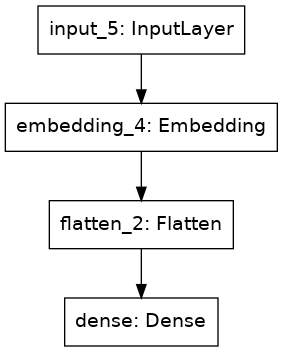

In [57]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))

x = tf.keras.layers.Embedding(                               ### memory efficient
    input_dim=vocab_length,
    output_dim=128,                                          ### vector space for each word with a certain dimension, captures info
    input_length=max_Len    
)(inputs)

x = tf.keras.layers.Flatten()(x)

outputs = tf.keras.layers.Dense(1, activation = "sigmoid")(x)
model = tf.keras.Model(inputs = inputs, outputs = outputs)

model.summary()
tf.keras.utils.plot_model(model)

In [58]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
453/453 [==============================] - 85s 185ms/step - loss: 1.6793 - accuracy: 0.6111 - val_loss: 0.4514 - val_accuracy: 0.7982
Epoch 2/100
453/453 [==============================] - 84s 185ms/step - loss: 0.3598 - accuracy: 0.8502 - val_loss: 0.4662 - val_accuracy: 0.7960
Epoch 3/100
453/453 [==============================] - 83s 183ms/step - loss: 0.2157 - accuracy: 0.9289 - val_loss: 0.4817 - val_accuracy: 0.7969
Epoch 4/100
453/453 [==============================] - 83s 184ms/step - loss: 0.1107 - accuracy: 0.9730 - val_loss: 0.5289 - val_accuracy: 0.7877


In [59]:
loss, acc = model.evaluate(X_test, y_test)

142/142 [==============================] - 11s 76ms/step - loss: 0.4358 - accuracy: 0.8099


In [64]:
print("Accuracy:{:.3f}%".format(acc*100))
print("Loss:{:.3f}%".format(loss))

Accuracy:80.989%
Loss:0.436%


## Model 2

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 22643)]           0         
_________________________________________________________________
embedding_6 (Embedding)      (None, 22643, 128)        1722112   
_________________________________________________________________
gru (GRU)                    (None, 22643, 256)        296448    
_________________________________________________________________
flatten_3 (Flatten)          (None, 5796608)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5796609   
Total params: 7,815,169
Trainable params: 7,815,169
Non-trainable params: 0
_________________________________________________________________


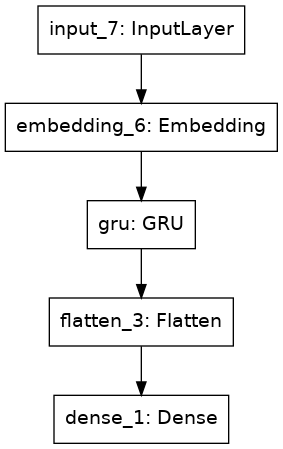

In [66]:
### RNN
## captures relationship btw words over a time period, not just positional matching seen in first model
inputs = tf.keras.Input(shape=(X_train.shape[1],))

x = tf.keras.layers.Embedding(                               ### memory efficient
    input_dim=vocab_length,
    output_dim=128,                                          ### vector space for each word with a certain dimension, captures info
    input_length=max_Len    
)(inputs)

x = tf.keras.layers.GRU(256, return_sequences = True, activation = "tanh")(x)                                     ### carries summary of previous words
x = tf.keras.layers.Flatten()(x)

outputs = tf.keras.layers.Dense(1, activation = "sigmoid")(x)
model = tf.keras.Model(inputs = inputs, outputs = outputs)

model.summary()
tf.keras.utils.plot_model(model)

In [67]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
453/453 [==============================] - 661s 1s/step - loss: 3.0096 - accuracy: 0.6448 - val_loss: 0.4499 - val_accuracy: 0.7941
Epoch 2/100
453/453 [==============================] - 660s 1s/step - loss: 0.3538 - accuracy: 0.8498 - val_loss: 0.4642 - val_accuracy: 0.7905
Epoch 3/100
453/453 [==============================] - 661s 1s/step - loss: 0.2229 - accuracy: 0.9156 - val_loss: 0.5768 - val_accuracy: 0.7596
Epoch 4/100
 46/453 [==>...........................] - ETA: 9:03 - loss: 0.1190 - accuracy: 0.9732

KeyboardInterrupt: 

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 22643)]           0         
_________________________________________________________________
embedding_7 (Embedding)      (None, 22643, 128)        1722112   
_________________________________________________________________
bidirectional (Bidirectional (None, 22643, 512)        592896    
_________________________________________________________________
flatten_4 (Flatten)          (None, 11593216)          0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11593217  
Total params: 13,908,225
Trainable params: 13,908,225
Non-trainable params: 0
_________________________________________________________________


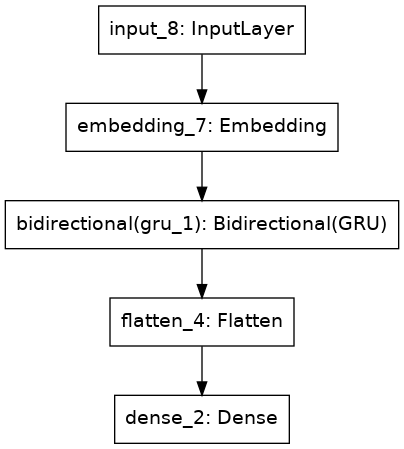

In [68]:
## Model 3
## Using bidirectional
inputs = tf.keras.Input(shape=(X_train.shape[1],))

x = tf.keras.layers.Embedding(                               ### memory efficient
    input_dim=vocab_length,
    output_dim=128,                                          ### vector space for each word with a certain dimension, captures info
    input_length=max_Len    
)(inputs)

x = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(256, return_sequences = True, activation = "tanh"))(x)                                     ### carries summary of previous words
x = tf.keras.layers.Flatten()(x)

outputs = tf.keras.layers.Dense(1, activation = "sigmoid")(x)
model = tf.keras.Model(inputs = inputs, outputs = outputs)

model.summary()
tf.keras.utils.plot_model(model)

## return sequences=True --> passing on each word and dimension increases

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 22643)]      0                                            
__________________________________________________________________________________________________
embedding_8 (Embedding)         (None, 22643, 128)   1722112     input_9[0][0]                    
__________________________________________________________________________________________________
flatten_5 (Flatten)             (None, 2898304)      0           embedding_8[0][0]                
__________________________________________________________________________________________________
gru_2 (GRU)                     (None, 256)          296448      embedding_8[0][0]                
____________________________________________________________________________________________

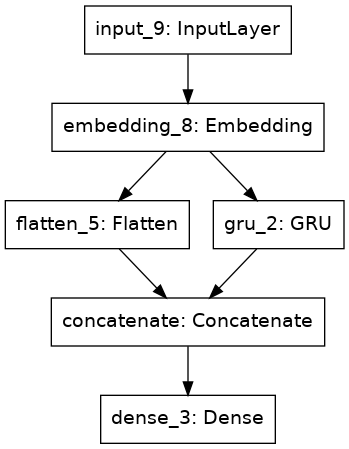

In [69]:
## Splitting layers
inputs = tf.keras.Input(shape=(X_train.shape[1],))

word_embedding = tf.keras.layers.Embedding(
    input_dim=vocab_length,
    output_dim=128,
    input_length=max_Len
)(inputs)

word_flatten = tf.keras.layers.Flatten()(word_embedding)
gru = tf.keras.layers.GRU(256, return_sequences=False, activation='tanh')(word_embedding)

concat = tf.keras.layers.concatenate([word_flatten, gru])

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(concat)


model = tf.keras.Model(inputs=inputs, outputs=outputs)

print(model.summary())
tf.keras.utils.plot_model(model)